In [50]:
import pandas as pd
import numpy as np
from collections import Counter
import pandas as pd
reviewDF = pd.read_csv('./DATA/IT_review.csv',usecols=[1,2,4])
reviewDF.loc[reviewDF['Aspect'] == "배터리",'Aspect'] = "전력 및 품질 관련"
reviewDF.loc[reviewDF['Aspect'] == "소비전력",'Aspect'] = "전력 및 품질 관련"

In [15]:
import pickle
def load_vocab():
    with open('./models/it_vocab.pkl', 'rb') as f:
        return pickle.load(f)

In [52]:
reviewDF.Aspect.unique()

array(['디자인', '사이즈', '가격', '음량/음질', '화질', '제조일/제조사', '품질', '기능', '조작성',
       '제품구성', '소음', '색상', '편의성', '무게', '시간/속도', '용량', '내구성',
       '전력 및 품질 관련', '소재'], dtype=object)

In [67]:
dic=reviewDF[['Aspect','SentimentText']].groupby('Aspect').count()

In [68]:
dic.index

Index(['가격', '기능', '내구성', '디자인', '무게', '사이즈', '색상', '소음', '소재', '시간/속도', '용량',
       '음량/음질', '전력 및 품질 관련', '제조일/제조사', '제품구성', '조작성', '편의성', '품질', '화질'],
      dtype='object', name='Aspect')

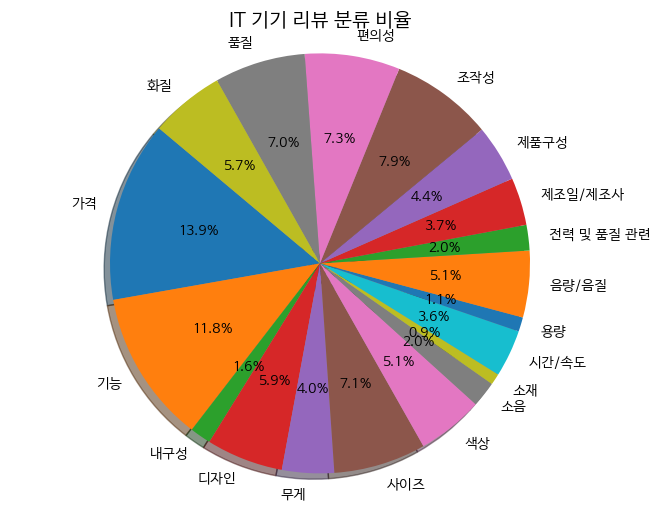

In [86]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf"  # 사용 가능한 한글 폰트 경로
fontprop = fm.FontProperties(fname=font_path, size=14)
plt.rc('font', family=fontprop.get_name())

# 색상 자동 설정
colors = plt.cm.tab10.colors  # 기본 색상 팔레트 사용

# 파이 그래프 그리기
plt.figure(figsize=(8, 6))
plt.pie(dic.values.reshape(-1), labels=dic.index, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# 그래프 제목
plt.title('IT 기기 리뷰 분류 비율', fontproperties=fontprop)
plt.axis('equal')  # 원을 둥글게 유지

# 그래프 보여주기
plt.show()

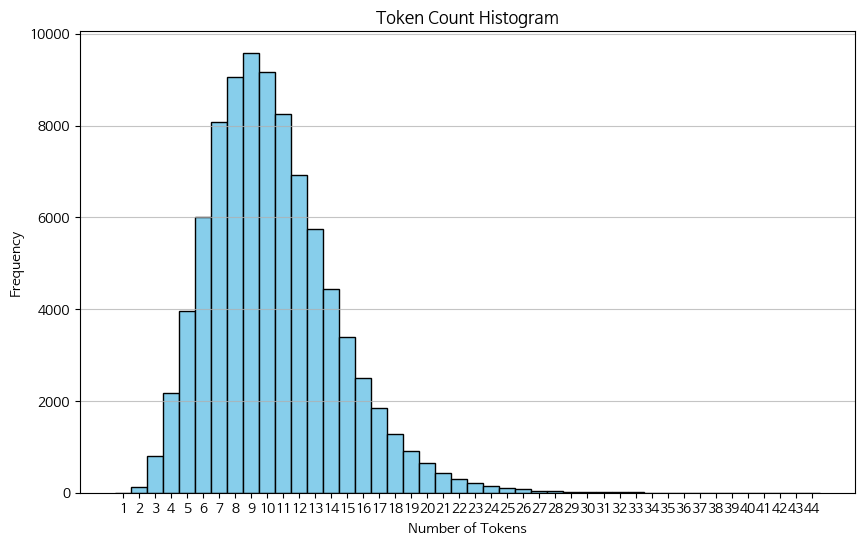

In [87]:
import matplotlib.pyplot as plt
from konlpy.tag import Okt

reviews = reviewDF['SentimentText'].to_list()

# 토큰화
tokenizer = Okt()
token_counts = [len(tokenizer.morphs(review)) for review in reviews]

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=range(1, max(token_counts) + 2), align='left', color='skyblue', edgecolor='black')
plt.title('Token Count Histogram')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.xticks(range(1, max(token_counts) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

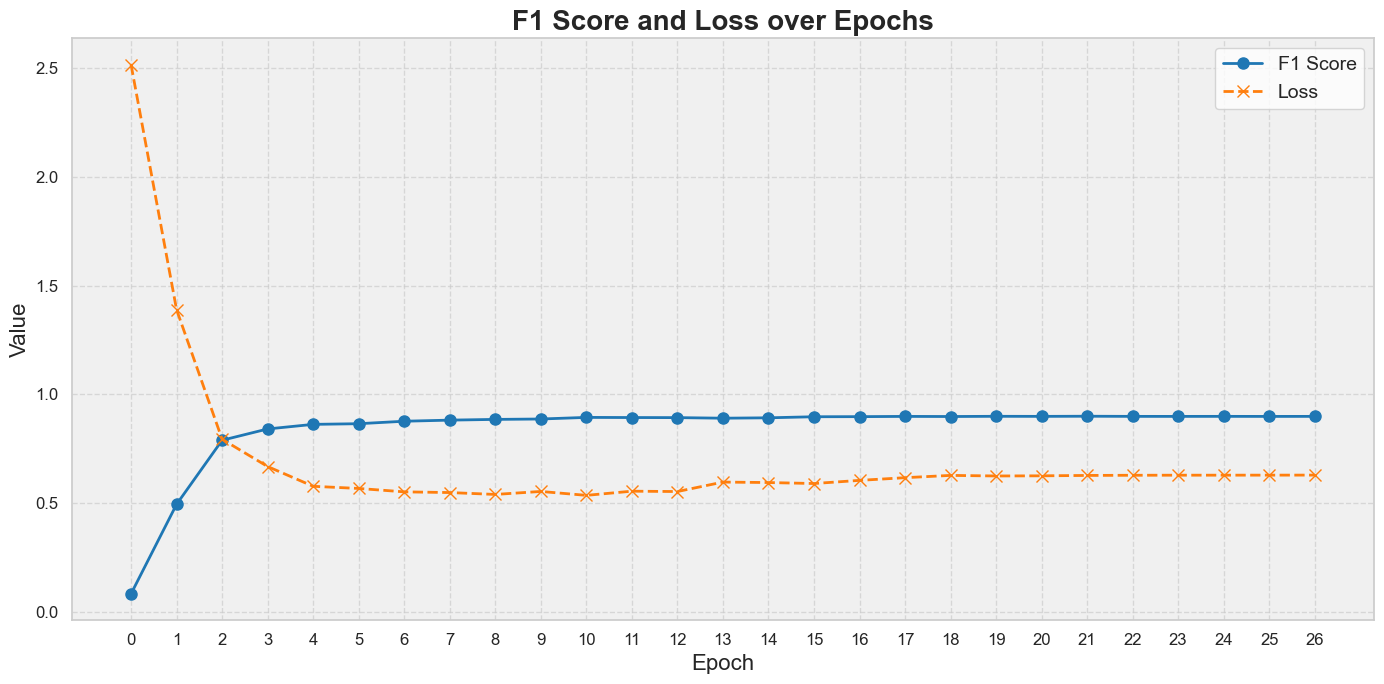

In [91]:
import seaborn as sns
# DataFrame 생성
df = pd.read_csv('./DATA/score_loss_history.csv')

# 스타일 설정
sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))

# f1_score 선 그래프
plt.plot(df.index, df['f1_score'], marker='o', label='F1 Score', color='#1f77b4', linestyle='-', linewidth=2, markersize=8)

# loss 선 그래프
plt.plot(df.index, df['loss'], marker='x', label='Loss', color='#ff7f0e', linestyle='--', linewidth=2, markersize=8)

# 그래프 꾸미기
plt.title('F1 Score and Loss over Epochs', fontsize=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks(df.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()

# 배경색 설정
plt.gca().set_facecolor('#f0f0f0')

# 그래프 표시
plt.show()

In [23]:
from konlpy.tag import Kkma
def split_sentences(text):
    kkma = Kkma()
    sentences = kkma.sentences(text)
    return sentences

# 예시 텍스트
text = "안녕하세요. 오늘 날씨가 좋네요. 내일은 비가 올지도 몰라요 어제는 정말 따뜻했어요."

# 문장 나누기
sentences = split_sentences(text)
print(sentences)

['안녕하세요.', '오늘 날씨가 좋네요.', '내일은 비가 올지도 몰라요 어제는 정말 따뜻했어요.']


In [16]:
vocab = load_vocab()

In [22]:
vocab.index('잘')

5002

In [25]:
# 항목 그룹화
group_mapping = {
    "가격": "가격 관련",
    "기능": "성능 관련",
    "조작성": "사용성 관련",
    "편의성": "사용성 관련",
    "사이즈": "물리적 속성",
    "품질": "전력 및 품질 관련",
    "디자인": "전력 및 품질 관련",
    "화질": "성능 관련",
    "음량/음질": "성능 관련",
    "색상": "전력 및 품질 관련",
    "제품구성": "전력 및 품질 관련",
    "무게": "물리적 속성",
    "제조일/제조사": "전력 및 품질 관련",
    "시간/속도": "성능 관련",
    "소음": "사용성 관련",
    "배터리": "전력 및 품질 관련",
    "내구성": "사용성 관련",
    "용량": "물리적 속성",
    "소재": "물리적 속성",
    "소비전력": "전력 및 품질 관련"
}

# 그룹화된 카테고리 추가
reviewDF['Aspect'] = reviewDF['Aspect'].map(group_mapping)

In [27]:
group_mapping.get('가격')

'가격 관련'

In [31]:
lists = [np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])]

In [37]:
import torch
tt = torch.Tensor(lists)

In [39]:
from konlpy.tag import Okt
tokenizer = Okt()

In [40]:
texts = ["안녕하세요", "반갑습니다"]
tokens = [tokenizer.morphs(text) for text in texts]
print(tokens)  # 토큰화 결과 확인

[['안녕하세요'], ['반갑습니다']]


In [ ]:
reviewDF['Aspect'].value_counts()

In [6]:
reviewDF = pd.read_csv('./DATA/IT_review_test.csv',usecols=[1,2,4])

In [ ]:
reviewDF['Aspect'].value_counts()

In [ ]:
reviewDF = pd.read_csv('./DATA/IT_reivew.csv',index_col=0)
print(reviewDF.info())
print(reviewDF.head(3))
print(reviewDF.isna().sum())

In [ ]:
aspectCD = reviewDF.Aspect.unique().tolist()
print(aspectCD)

In [259]:
reviewDF['Aspect'] = reviewDF['Aspect'].map(lambda x:aspectCD.index(x))
reviewDF.loc[reviewDF['SentimentPolarity'] == -1,'SentimentPolarity'] = 0

In [ ]:
trainDF = reviewDF.groupby('Aspect').apply(lambda x: x.sample(frac=0.8)).reset_index(drop=True)
testDF = reviewDF.drop(index=trainDF.index)
print(trainDF.shape, trainDF.ndim)
print(testDF.shape, testDF.ndim)

In [ ]:
labelCD = reviewDF.Aspect.unique().tolist() 
labelCD

In [ ]:
reviewDF[reviewDF.columns[0:2]].groupby('Aspect').count().sort_values(by='SentimentText').index[-10:].astype('int')

In [ ]:
stopwords_list = set([
'은', '는', '이', '가', '을', '를', '의', '에', '에서', '와', '과', '도', '만', '으로', '로', '처럼', '같이', '조차', '마저', 
'그러나', '그래서', '그러니까', '왜냐하면', '그', '저', '이것', '저것', '무엇','이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하'
])
print(stopwords_list)

In [353]:
reviewDF = pd.read_csv('./DATA/IT_reivew.csv', usecols=[1, 2, 4])      # 필요한 컬럼 추출
# Aspect 컬럼에서 가장 빈도수가 높은 10개 값 찾기
top_10_aspects = reviewDF['Aspect'].value_counts().nlargest(10).index.tolist()

# 해당 값들이 포함된 모든 행 추출
filtered_df = reviewDF.drop(index=reviewDF[~reviewDF['Aspect'].isin(top_10_aspects)].index).reset_index()
trainDF = filtered_df.groupby('Aspect').apply(lambda x: x.sample(frac=0.8)).reset_index(drop=True)     # train ,test 분리
testDF = filtered_df.drop(index=trainDF.index)

In [ ]:
trainDF['Aspect'].value_counts()

In [381]:
labelCD = trainDF.Aspect.unique().tolist()                   # Aspect 컬럼의 유니크 값 리스트
trainDF['Aspect'] = trainDF['Aspect'].map(lambda x: labelCD.index(x))         # 다중 분류 라벨링 인코딩
trainDF = trainDF.dropna()
trainDF.loc[trainDF['SentimentPolarity'] == -1, 'SentimentPolarity'] = 0      # 2진 분류 인코딩

In [ ]:
import torch
def calculate_class_weights(train_labels, num_classes, device):
    # 각 클래스의 빈도 계산
    class_counts = np.bincount(train_labels.astype('int'))
    class_weights = 1. / class_counts
    # 가중치를 텐서로 변환하고, 장치에 맞게 이동
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    return class_weights*1000

class_weights = calculate_class_weights(trainDF['Aspect'].values, len(aspectCD), 'cpu')
print(class_weights)

In [ ]:
from torch.utils.data import WeightedRandomSampler
class_counts = np.bincount(trainDF['Aspect'].values.astype('int'), minlength= len(aspectCD))
class_weights = np.where(class_counts > 0, 1. / class_counts, 0.)
sample_weights = class_weights[trainDF['Aspect'].values]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

In [ ]:
sample_weights

In [ ]:
import numpy as np
import torch

def calculate_class_weights(train_labels, num_classes, device):
    class_counts = np.bincount(train_labels.astype('int'), minlength=num_classes)
    class_weights = np.where(class_counts > 0, 1. / class_counts, 1.0)
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    
    # 가중치 정규화 (선택 사항)
    max_weight = class_weights.max()
    class_weights /= max_weight
    
    return class_weights

# trainDF['Aspect'].values, aspectCD는 당신의 데이터셋에 맞게 수정하세요.
class_weights = calculate_class_weights(trainDF['Aspect'].values, len(aspectCD), 'cpu')
print(class_weights)

In [ ]:
trainDF['SentimentPolarity'].value_counts()

In [ ]:
reviewDF.shape

In [ ]:
output = torch.randn(16, 20)  # 모델의 출력
target = torch.randint(0, 20, (16,))  # 타겟 (16개의 클래스 인덱스)
torch.softmax(torch.tensor(output))

In [ ]:
labels = torch.tensor(list(zip(trainDF['Aspect'].values, trainDF['SentimentPolarity'].values)))
labels[:,0]

In [ ]:
# Logits from your model
logits = torch.randn(16, 1, dtype=torch.float32)  # Example with 16 samples
# Target labels as float32
target = torch.tensor([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=torch.float32)

# Loss calculation
loss_function = torch.nn.BCEWithLogitsLoss()
loss = loss_function(logits, target.view(-1, 1))  # Reshape target if necessary
logits

In [143]:
def buid_vocab(corpus, n_vocab, special_tokens):
    counter = Counter()                                     # count 인스턴스 생성
    for tokens in corpus:
        counter.update(tokens)                              # 카운트 인스턴스로 빈도 확인
    vocab = special_tokens                                  # vocab에서 special_tokens 추가
    for token, count in counter.most_common(n_vocab):       # counter 안의 데이터 주어진 개수 만큼 vocab에 추가
        vocab.append(token)
    return vocab                                            # 단어 사전 리턴